In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.columns.values[0] = 'Page_Views' #Rename value to page views 
df.index = pd.to_datetime(df.index) #set index as date time
df

,Page_Views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
# Clean data
df = df[(df['Page_Views'] < df['Page_Views'].quantile(0.975)) & (df['Page_Views'] > df['Page_Views'].quantile(0.025))]
df

,Page_Views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [18]:
# Copy Data for Lineplot
df_line = df.copy()
df_line.max()

Page_Views    177588
dtype: int64

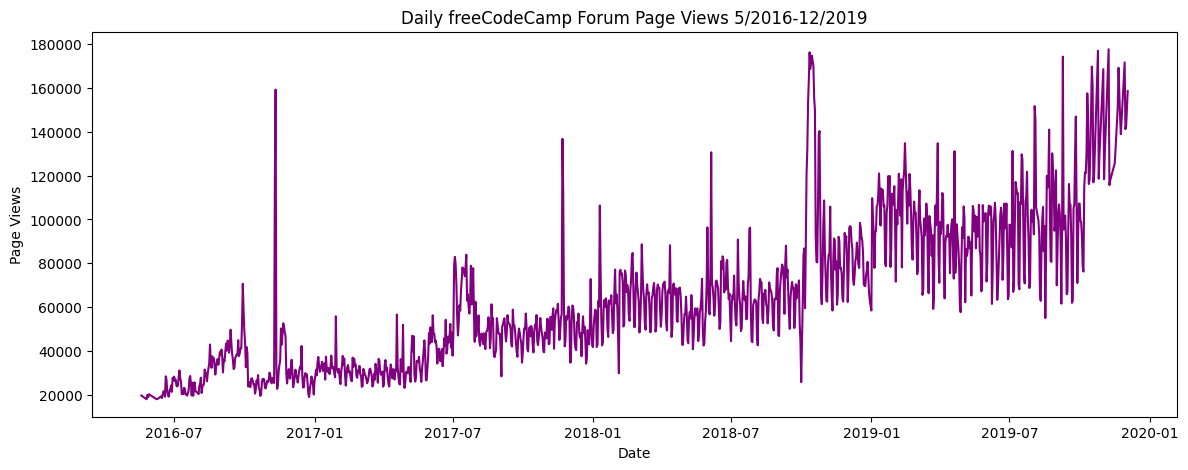

In [19]:
#Draw The Line Plot
fig, ax = plt.subplots(figsize=(14,5))
plt.plot(df_line, 'purple')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()


In [78]:
# Copy Data for Bar Plots
df_bar = df.copy()
df_bar

,Page_Views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [79]:
#Group the data by year, with value = average vies of each month
df_bar['month'] = df_bar.index.copy() #Copy timeframe index to new column month, 
df_bar['month'] = df_bar['month'].dt.month_name(locale='English') #Convert date time to month, (can only be used in datetime data format)
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year #Convert date time to year
df_bar

,Page_Views,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [80]:
#Create list of unique months in order, to be used in categorical
cat = df_bar.loc[df_bar['year'] == 2017, 'month'].unique().tolist()
cat

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [81]:
#Set the months as categories, to make the months in order (from Jan to dec)
df_bar['month'] = pd.Categorical(df_bar['month'], categories=cat)

In [82]:
#Pivot the table to grouped the bar plot for each month, every year 
df_bar = df_bar.pivot_table(index='year', columns='month', values='Page_Views', aggfunc='mean')
df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Per Views')

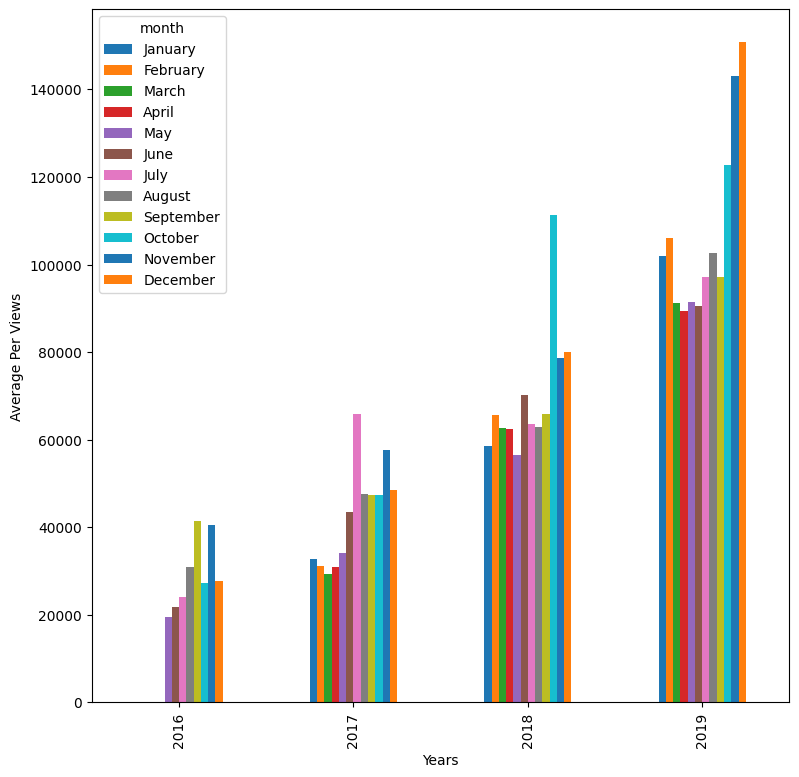

In [103]:
fig = df_bar.plot(kind='bar', figsize=(9,9)).get_figure()
plt.xlabel('Years')
plt.ylabel('Average Page Views')

In [7]:
#Draw Boxplot 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,Page_Views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [105]:
#Used to order the month accordingly
box_order = df_box.loc[df_box['year'] == 2017, 'month'].unique().tolist()
box_order

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

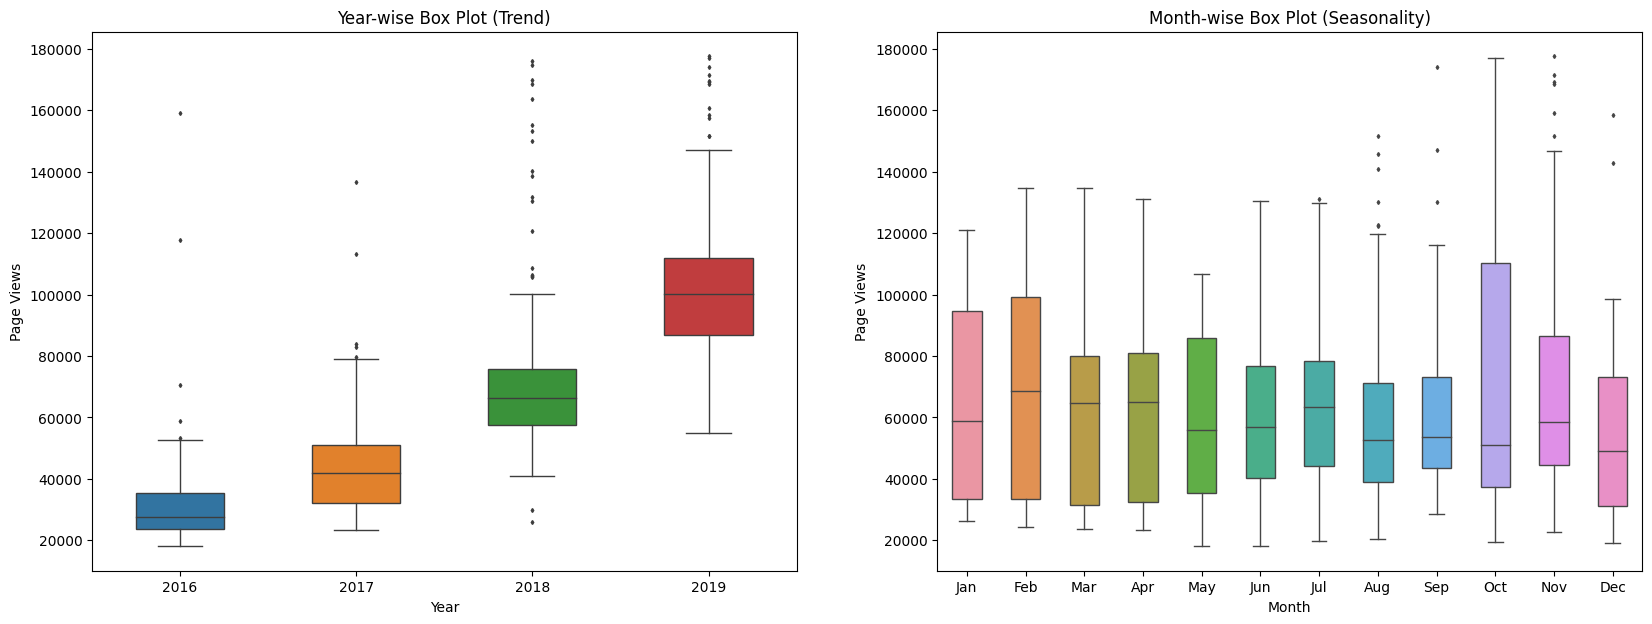

In [107]:
# Draw box plots (using Seaborn)
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
ax1 = sns.boxplot(data=df_box, x='year', y='Page_Views', ax=ax[0], fliersize=2, linewidth=1, width=0.5)
ax1.set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')


ax2 = sns.boxplot(data=df_box, x='month', y='Page_Views', ax=ax[1], fliersize=2, linewidth=1, width=0.5, order=box_order)
ax2.set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')

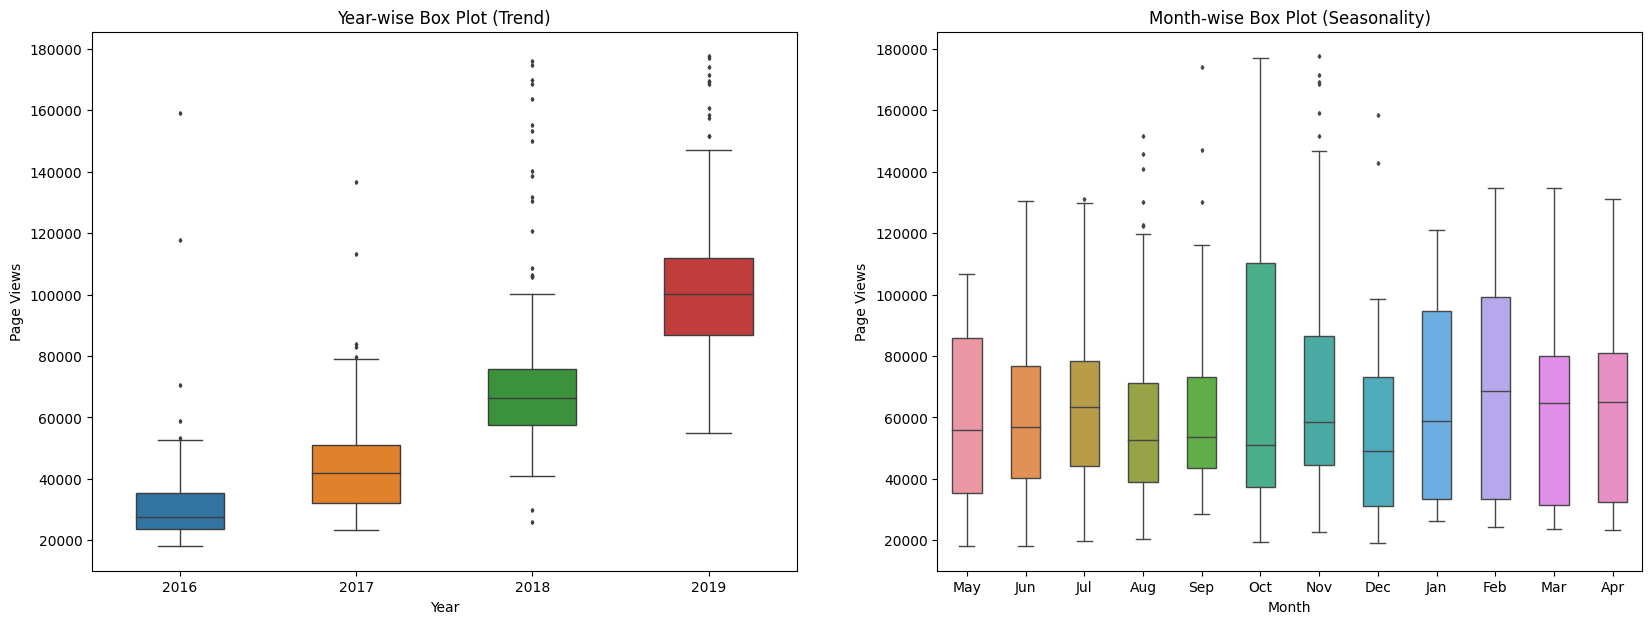

In [76]:
fig